Root Mean Squared Error (RMSE): 0.31592442615009386
Mean Absolute Error (MAE): 0.2450835667320696


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


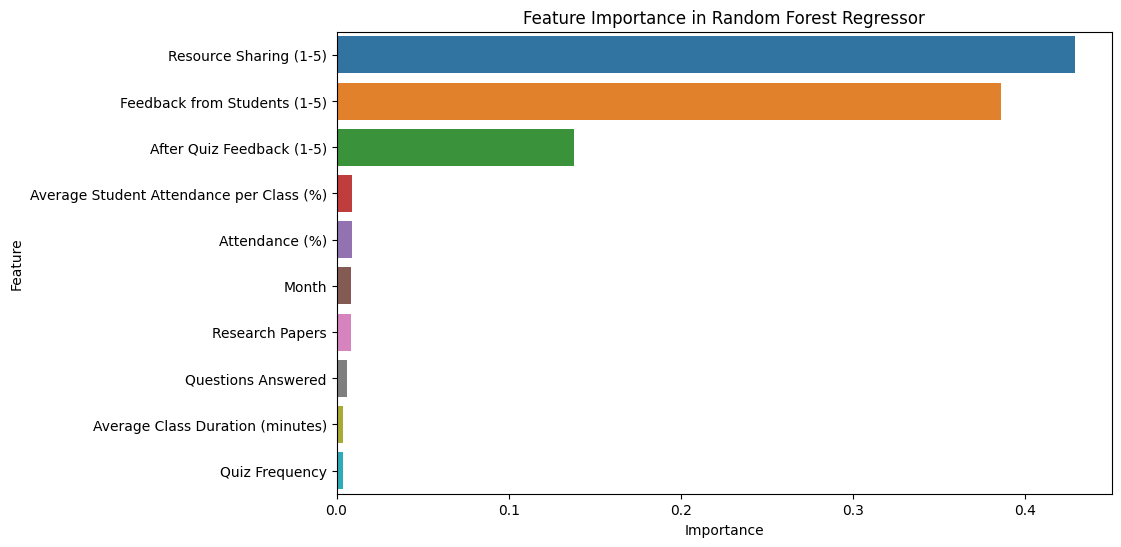

[[  3   4   0   0   0   0   0   0   0   0   0]
 [  0  30  11   0   0   0   0   0   0   0   0]
 [  0   5 103  15   1   0   0   0   0   0   0]
 [  0   0   8 139  30   0   0   0   0   0   0]
 [  0   0   0  29 183  27   0   0   0   0   0]
 [  0   0   0   0  35 214  27   0   0   0   0]
 [  0   0   0   0   0  31 185  28   0   0   0]
 [  0   0   0   0   0   0  27 158  10   0   0]
 [  0   0   0   0   0   0   0  18  67   2   0]
 [  0   0   0   0   0   0   0   0  16  19   4]
 [  0   0   0   0   0   0   0   0   0   5   6]]


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Data
data = pd.read_excel('./teacher_profile_scores_12_months.xlsx')  # Replace with the actual path to your dataset


# Step 3: Split the Data
X = data.drop(columns=['Profile Score','Teacher Name'])  # Features
y = data['Profile Score']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = rf_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Step 6: Feature Importance
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest Regressor')
plt.show()

# confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
y_pred = np.round(y_pred)
y_test = np.round(y_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)